In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesOther_n', normalize=True, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.832 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.529 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.160 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.126 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.607 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=6.251 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.508 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

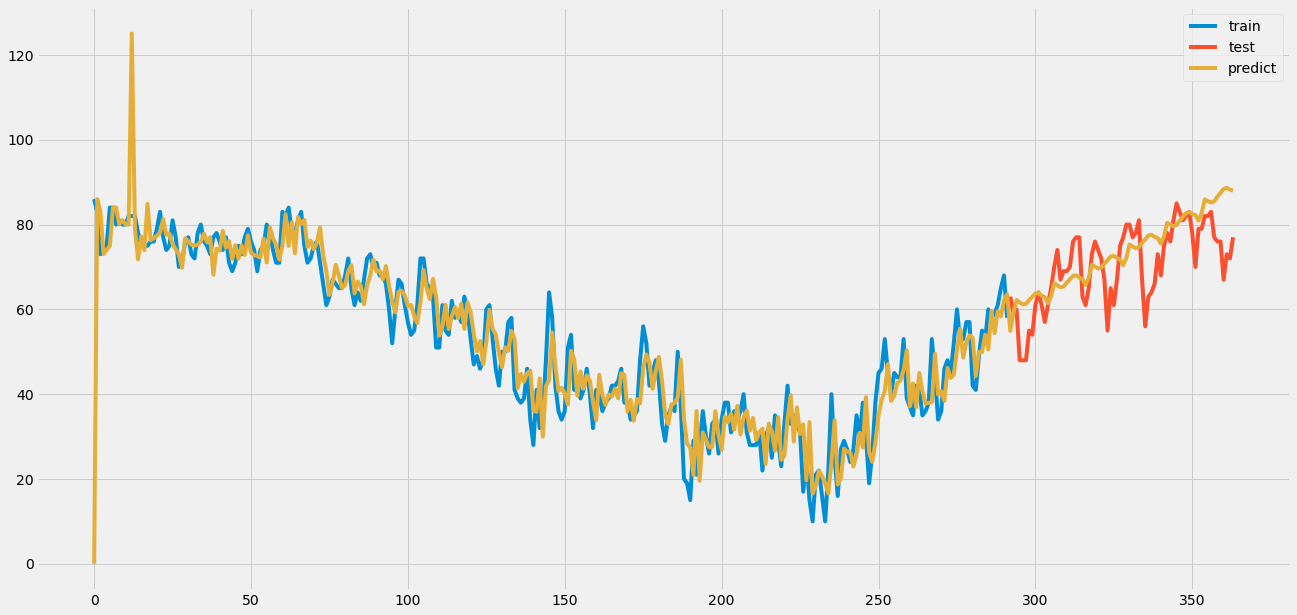

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.20753424658  Num NaN: 0'

'Test Error: 5.06666666667    Num NaN: 0'

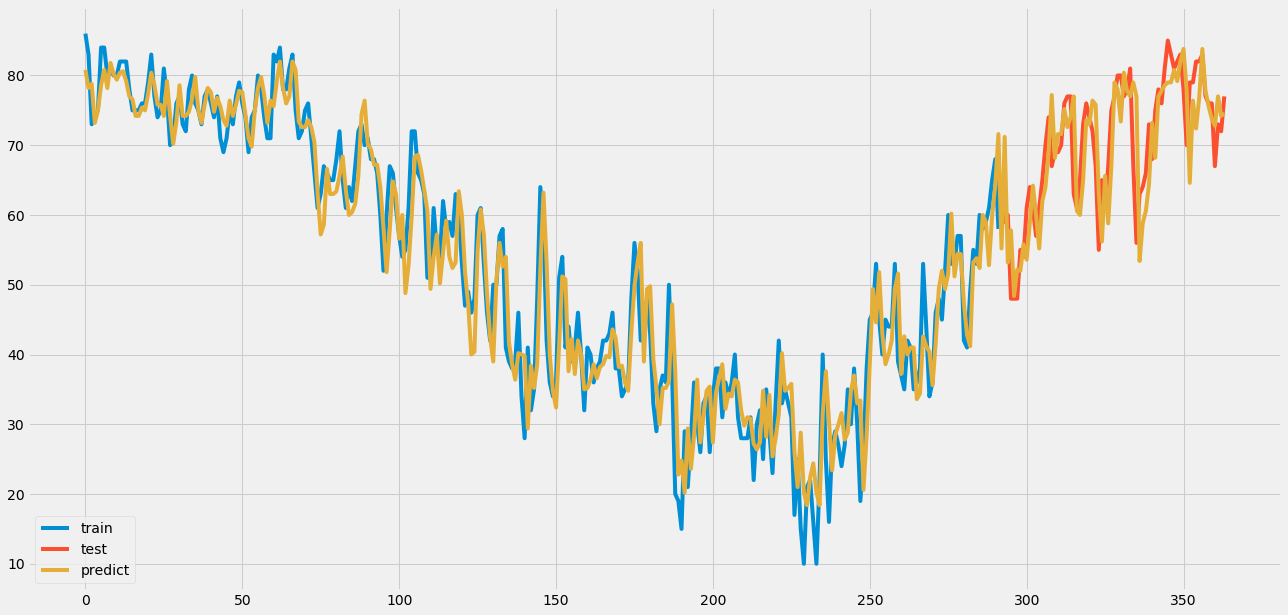

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 7.70177422064  Num NaN: 0'

'Test Error: 7.71597953111    Num NaN: 0'

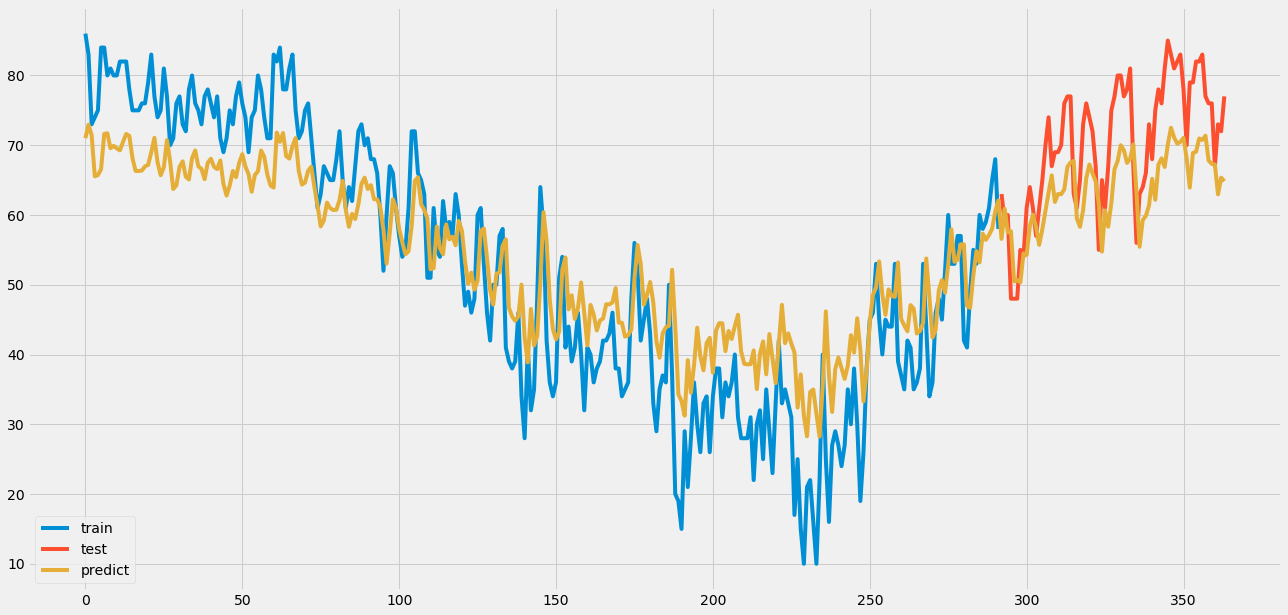

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 2.08837573386  Num NaN: 0'

'Test Error: 4.96311177249    Num NaN: 0'

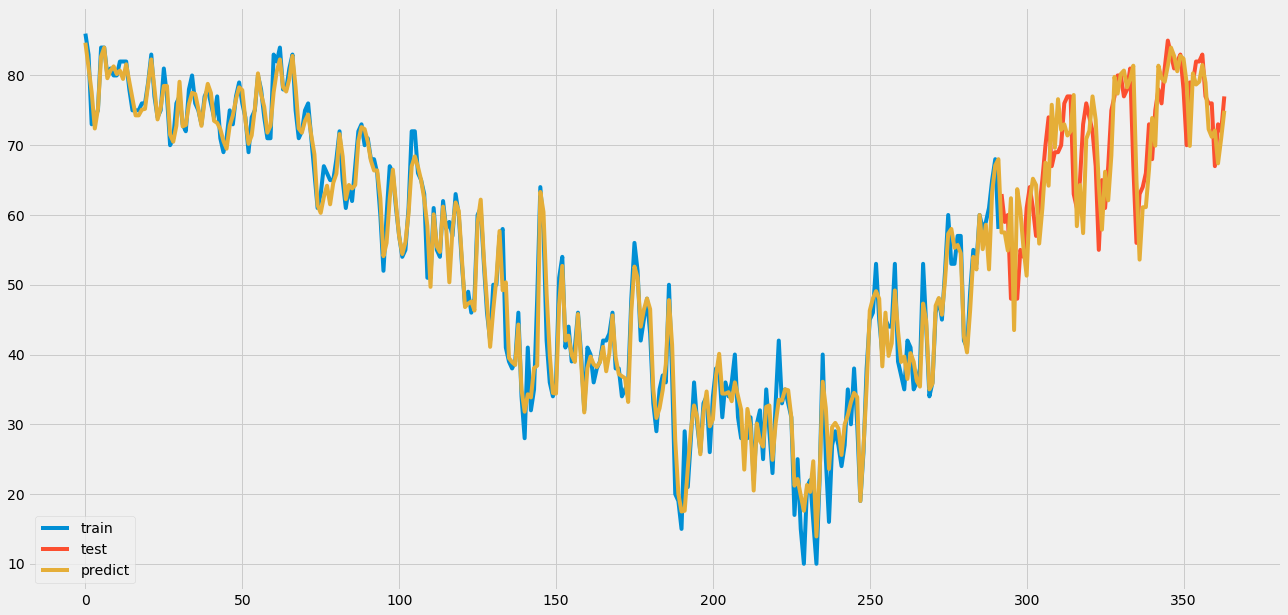

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.44288238441  Num NaN: 0'

'Test Error: 5.13845100128    Num NaN: 0'

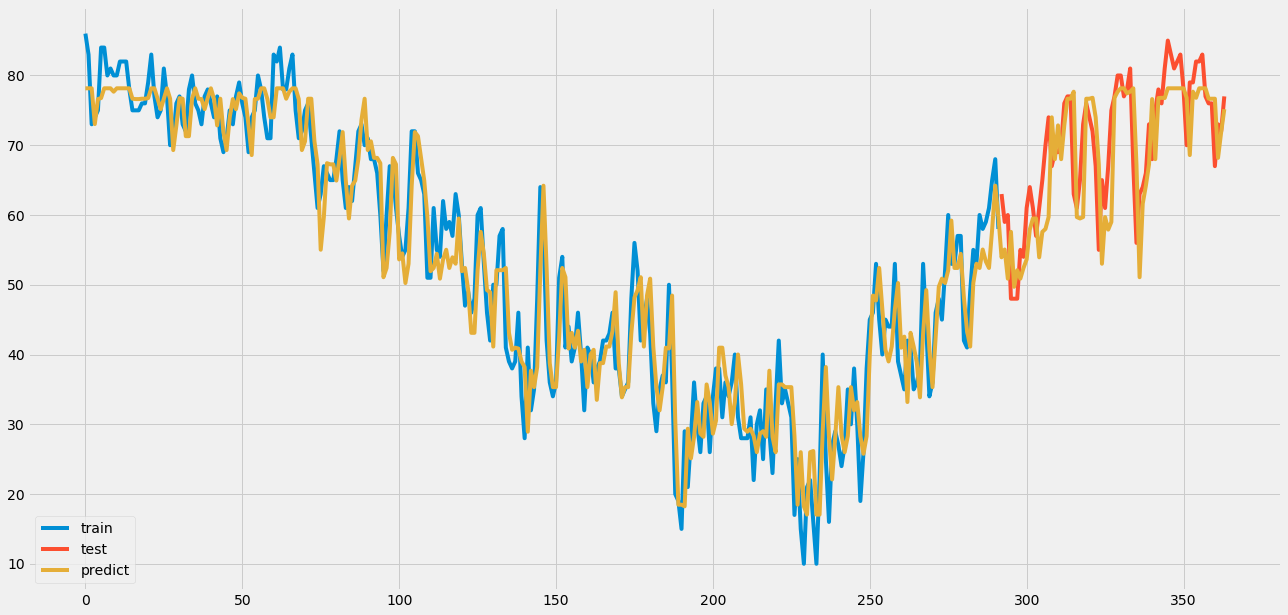

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 3.79134374122  Num NaN: 0'

'Test Error: 25.3807025486    Num NaN: 0'

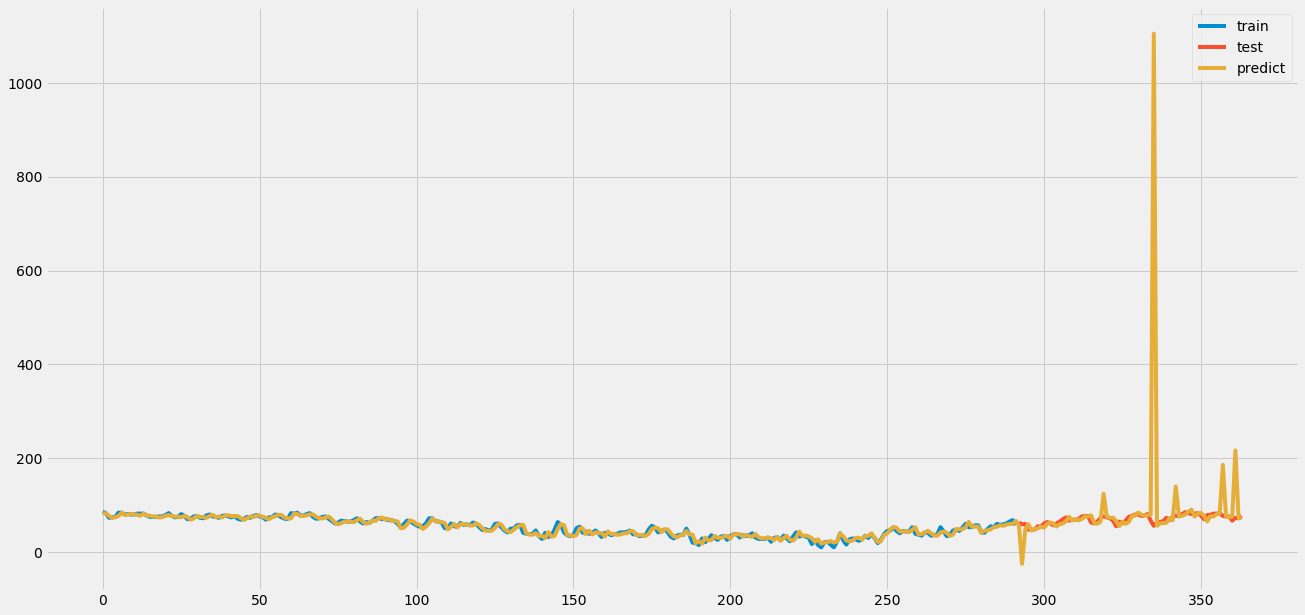

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.57624418585  Num NaN: 5'

'Test Error: 6.32932107205    Num NaN: 5'

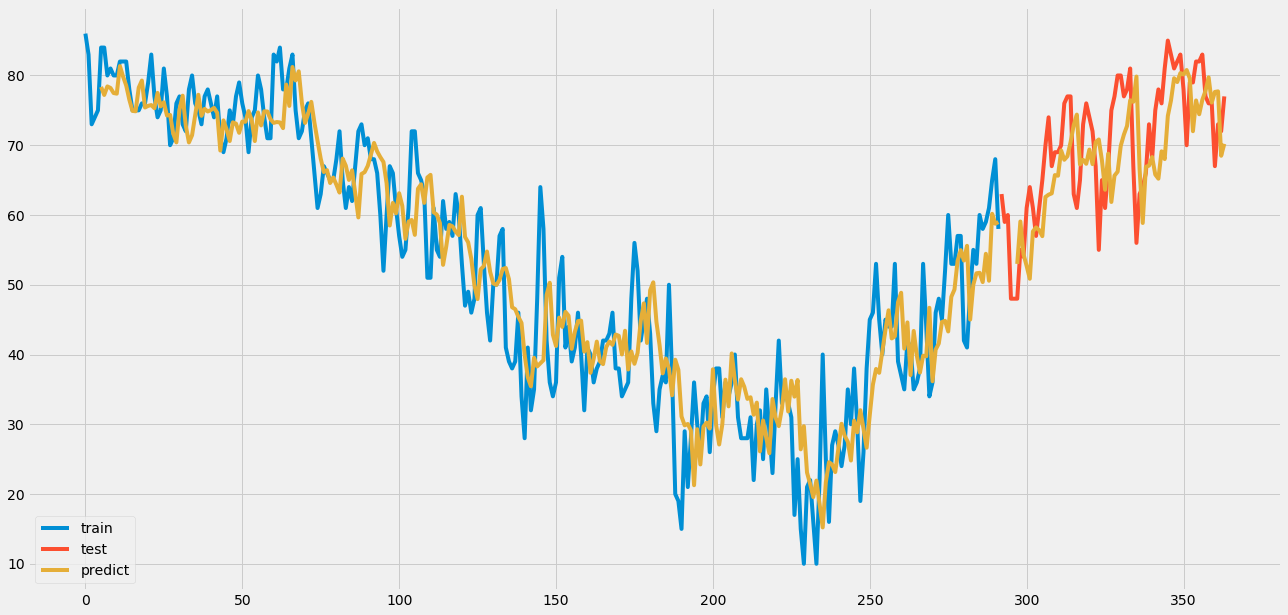

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2289 - val_loss: 0.1335
Epoch 2/10
 - 0s - loss: 0.1476 - val_loss: 0.1399
Epoch 3/10
 - 0s - loss: 0.1346 - val_loss: 0.1367
Epoch 4/10
 - 0s - loss: 0.1248 - val_loss: 0.1311
Epoch 5/10
 - 0s - loss: 0.1189 - val_loss: 0.1261
Epoch 6/10
 - 0s - loss: 0.1149 - val_loss: 0.1071
Epoch 7/10
 - 0s - loss: 0.1120 - val_loss: 0.1057
Epoch 8/10
 - 0s - loss: 0.1095 - val_loss: 0.0905
Epoch 9/10
 - 0s - loss: 0.1095 - val_loss: 0.0982
Epoch 10/10
 - 0s - loss: 0.1082 - val_loss: 0.0890


'Train Error: 8.26386791156  Num NaN: 5'

'Test Error: 6.67323183658    Num NaN: 5'

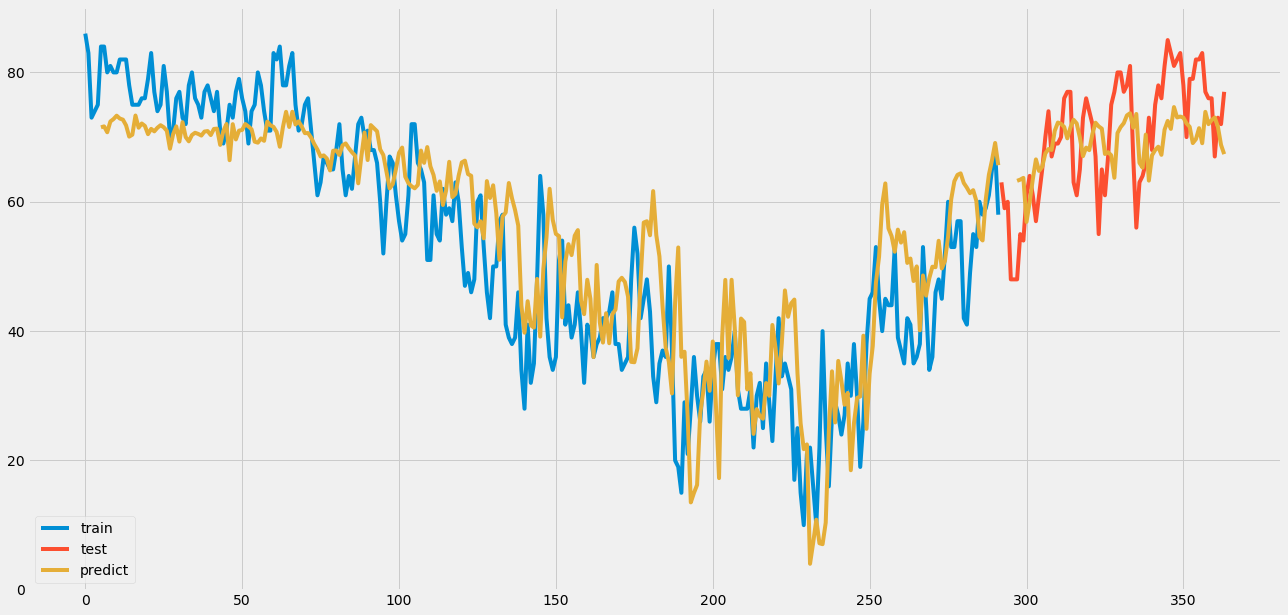

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.3243 - val_loss: 0.2272
Epoch 2/10
 - 0s - loss: 0.2418 - val_loss: 0.1509
Epoch 3/10
 - 0s - loss: 0.2301 - val_loss: 0.0949
Epoch 4/10
 - 0s - loss: 0.2361 - val_loss: 0.1078
Epoch 5/10
 - 0s - loss: 0.2456 - val_loss: 0.4466
Epoch 6/10
 - 0s - loss: 0.2406 - val_loss: 0.2035
Epoch 7/10
 - 0s - loss: 0.2422 - val_loss: 0.4085
Epoch 8/10
 - 0s - loss: 0.2345 - val_loss: 0.4650
Epoch 9/10
 - 0s - loss: 0.2370 - val_loss: 0.3413
Epoch 10/10
 - 0s - loss: 0.2431 - val_loss: 0.0993


'Train Error: 21.1133173766  Num NaN: 5'

'Test Error: 7.44852470284    Num NaN: 5'

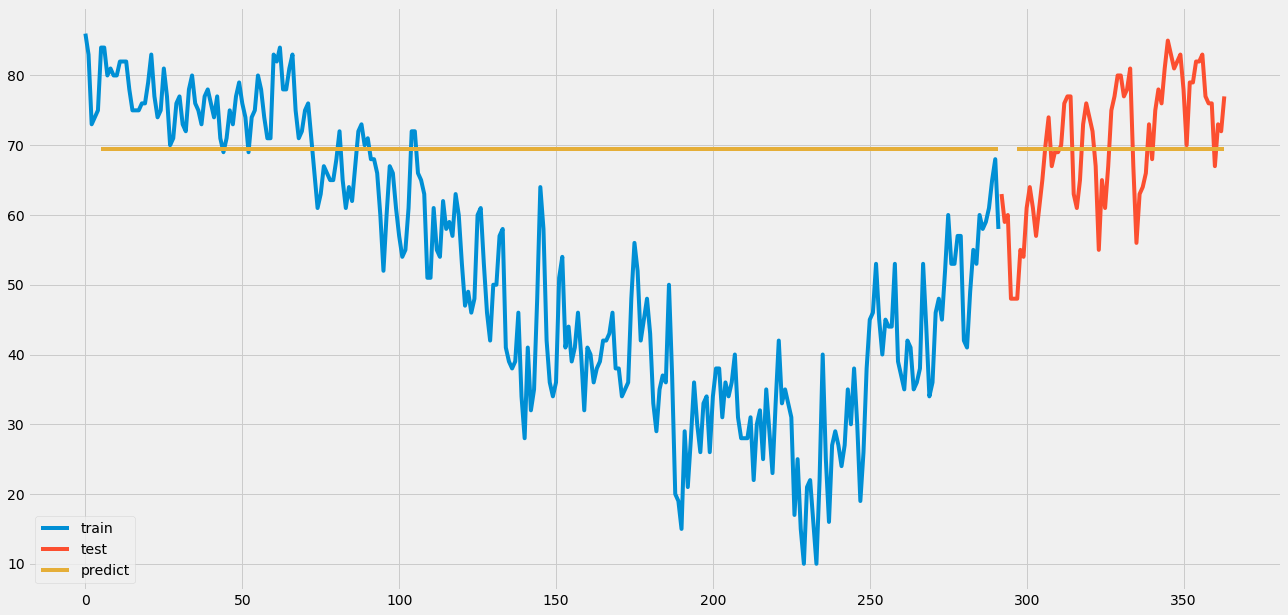

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8941 - val_loss: 0.7242
Epoch 2/10
 - 0s - loss: 0.7116 - val_loss: 0.5410
Epoch 3/10
 - 0s - loss: 0.5685 - val_loss: 0.3977
Epoch 4/10
 - 0s - loss: 0.4462 - val_loss: 0.2940
Epoch 5/10
 - 0s - loss: 0.3490 - val_loss: 0.2246
Epoch 6/10
 - 0s - loss: 0.2766 - val_loss: 0.1788
Epoch 7/10
 - 0s - loss: 0.2251 - val_loss: 0.1465
Epoch 8/10
 - 0s - loss: 0.1871 - val_loss: 0.1221
Epoch 9/10
 - 0s - loss: 0.1582 - val_loss: 0.1024
Epoch 10/10
 - 0s - loss: 0.1343 - val_loss: 0.0856


'Train Error: 1230.73625448  Num NaN: 0'

'Test Error: 867.019444558    Num NaN: 0'

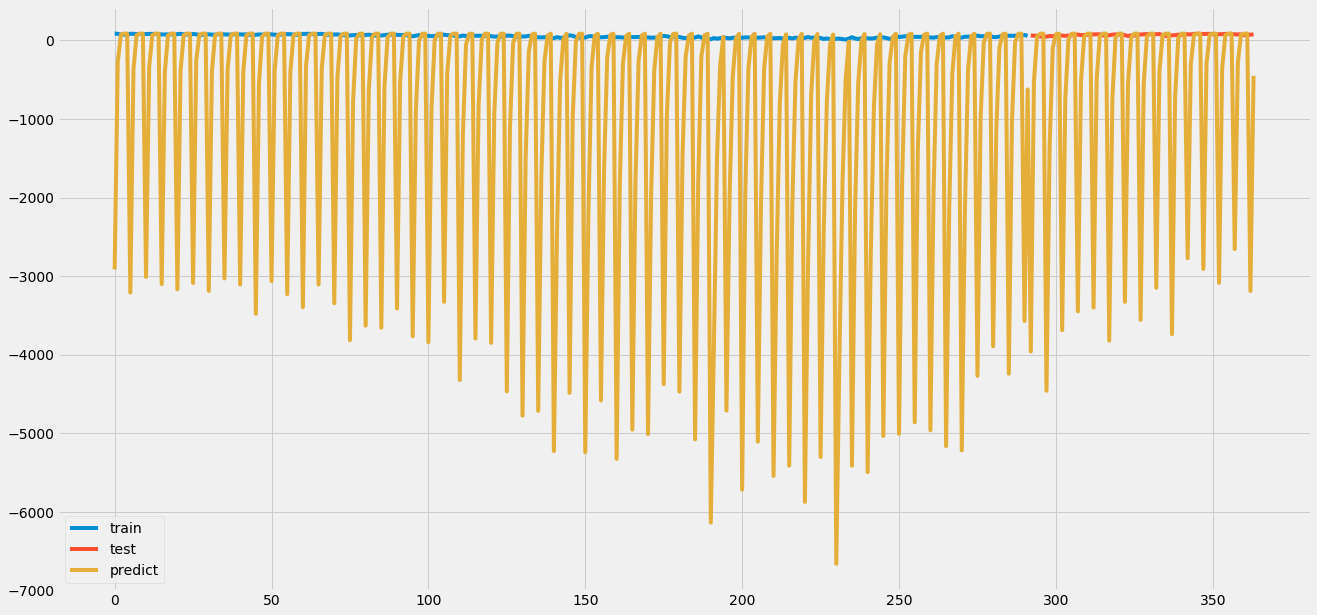

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.0151 - val_loss: 0.8646
Epoch 2/10
 - 1s - loss: 0.8905 - val_loss: 0.7443
Epoch 3/10
 - 1s - loss: 0.7919 - val_loss: 0.6456
Epoch 4/10
 - 1s - loss: 0.7083 - val_loss: 0.5514
Epoch 5/10
 - 1s - loss: 0.6252 - val_loss: 0.4563
Epoch 6/10
 - 1s - loss: 0.5363 - val_loss: 0.3603
Epoch 7/10
 - 1s - loss: 0.4386 - val_loss: 0.2680
Epoch 8/10
 - 1s - loss: 0.3300 - val_loss: 0.1888
Epoch 9/10
 - 1s - loss: 0.2127 - val_loss: 0.1341
Epoch 10/10
 - 1s - loss: 0.1048 - val_loss: 0.1056


'Train Error: 472.629828754  Num NaN: 0'

'Test Error: 1065.25845316    Num NaN: 0'

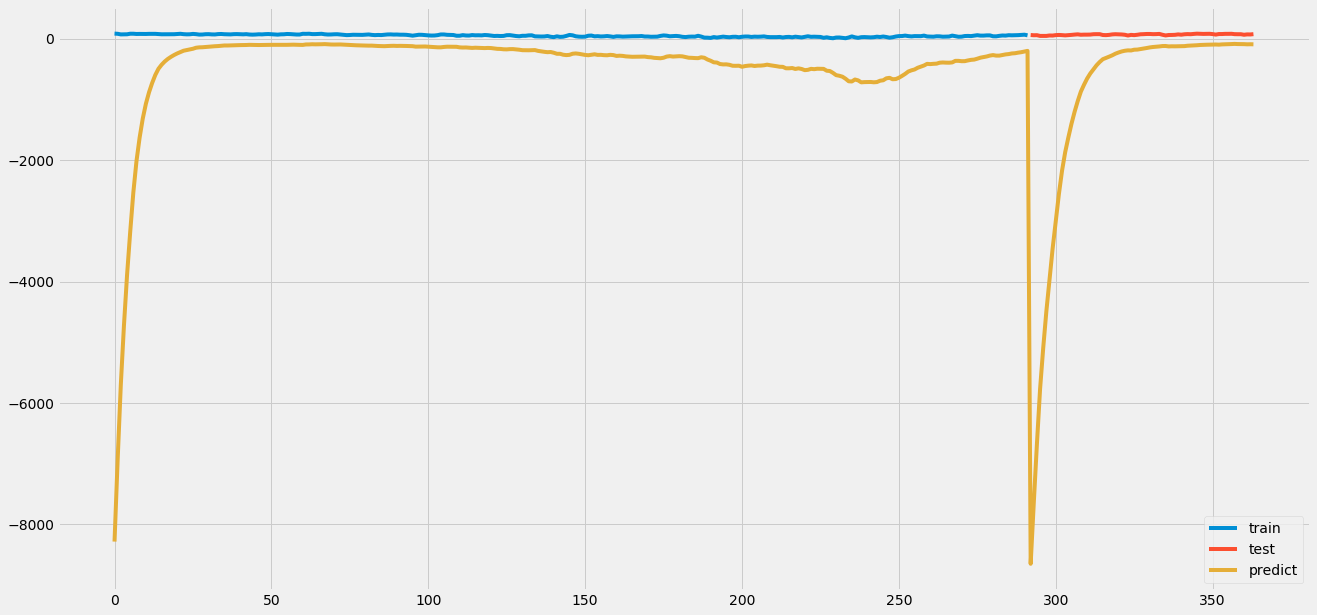

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')